In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [38]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [5]:
df=pd.read_csv('data/men_shoes.csv',low_memory=False)
df.shape

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [8]:
mean_price=np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [10]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

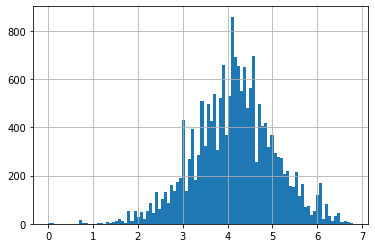

In [11]:
np.log(df['prices_amountmin']+1).hist(bins=100)
#ALBO
#np.log1p(df['prices_amountmin']).hist(bins=100)

In [12]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [13]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [18]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring ='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring ='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [24]:
df['manufacturer'].value_counts()

Puma                  476
Nike                  374
New Balance           249
VANS                  170
Reebok                128
                     ... 
UGG MENS                1
Forever                 1
Coronado                1
Olukai                  1
Mizuno Running USA      1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat']=df['manufacturer'].factorize()[0]

In [29]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [28]:
run_model(['manufacturer_cat','brand_cat'])

(-58.539304199085976, 4.3112232316154415)

In [0]:
!git add matrix_one/Matrix_day4.ipynb

In [60]:
!git commit -m "First model on Men's Shoe Prices dataset from data.world"

[master 7ec2300] First model on Men's Shoe Prices dataset from data.world
 2 files changed, 4 insertions(+)
 create mode 100644 matrix_one/Matrix_day4.ipynb


In [61]:
!git push -u origin master

To https://github.com/jsekiewicz/dw_matrix.git
 ! [rejected]        master -> master (non-fast-forward)
error: failed to push some refs to 'https://632f193135b8209e43b32605fe944d70eb735a1d@github.com/jsekiewicz/dw_matrix.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [62]:
!git pull

hint: Waiting for your editor to close the file... error: unable to start editor 'editor'
Not committing merge; use 'git commit' to complete the merge.


In [63]:
!git status

On branch master
Your branch and 'origin/master' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .gitignore
	modified:   matrix_one/Matrix_day3.ipynb
	modified:   matrix_one/Matrix_day4.ipynb

